In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score

In [2]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
data = pd.read_csv('feature_selected_data.csv')
data.head()

,active_cust,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1268.8,85,4,1,0,121,4,85
1,0,1264.8,85,4,1,0,133,4,85
2,0,1275.2,82,4,1,0,118,4,85
3,0,1275.2,82,4,1,0,123,4,85
4,1,1287.2,80,4,1,0,177,4,85


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   active_cust                 98666 non-null  int64  
 1   expenditure                 98666 non-null  float64
 2   months_on_network           98666 non-null  int64  
 3   Num_complaints              98666 non-null  int64  
 4   number_plan_changes         98666 non-null  int64  
 5   relocated                   98666 non-null  int64  
 6   monthly_bill                98666 non-null  int64  
 7   technical_issues_per_month  98666 non-null  int64  
 8   Speed_test_result           98666 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.8 MB


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(['active_cust'],axis=1),data['active_cust'],test_size=0.2,random_state=20)

In [6]:
X_train.shape,y_train.shape

((78932, 8), (78932,))

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

## RandomForest

In [8]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9999834573445432
RF test roc-auc: 0.9565299946796002


In [9]:
ytrain_pred

array([[0.75, 0.25],
       [0.01, 0.99],
       [0.15, 0.85],
       ...,
       [0.98, 0.02],
       [0.04, 0.96],
       [1.  , 0.  ]])

## GradientBoosting

In [10]:
log_classifier=GradientBoostingClassifier()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9297684422241896
Logistic test roc-auc: 0.9330450764313567


## XGBoost

In [11]:
ada_classifier=xgb.XGBClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:34:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Adaboost train roc-auc: 0.9659021518850924
Adaboost test roc-auc: 0.9589289623473641


In [12]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9587856436008695


In [13]:
pd.concat(pred,axis=1)

,0,1,2
0,0.0300,0.272131,0.241285
1,0.0000,0.029830,0.000920
2,0.8425,0.848762,0.572094
3,1.0000,0.958177,0.998849
4,0.4800,0.654910,0.628175
...,...,...,...
19729,0.6600,0.911026,0.952472
19730,0.0000,0.015655,0.000344
19731,0.0100,0.137008,0.043382
19732,0.8400,0.824246,0.780598


In [14]:
final_prediction

0        0.181139
1        0.010250
2        0.754452
3        0.985675
4        0.587695
           ...   
19729    0.841166
19730    0.005333
19731    0.063463
19732    0.814948
19733    0.956799
Length: 19734, dtype: float64

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.99212102e+00, 9.92121022e-01, 9.88915518e-01, ...,
       2.08315147e-03, 2.07365150e-03, 1.51611495e-03])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
2417,0.511334,0.907419
2432,0.507375,0.907368
2421,0.510262,0.907368
2424,0.509780,0.907368
2419,0.510308,0.907368


In [18]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

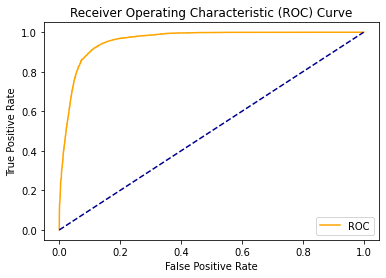

In [19]:
plot_roc_curve(fpr,tpr)

In [73]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Adaboost train roc-auc: 0.9659021518850924
Adaboost test roc-auc: 0.9589289623473641


In [74]:
preds = model.predict_proba(X_test)

In [75]:
list_preds = list(preds)

In [76]:
preds_class = []
for predicted_proba in list_preds:
    if predicted_proba[0]<0.511334:
        preds_class.append(1)
    else:
        preds_class.append(0)

In [77]:
final_preds = np.array(preds_class)

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [79]:
cm=confusion_matrix(y_test,final_preds)
acc = accuracy_score(y_test,final_preds)
print(cm)
print(acc)

[[ 7188  1189]
 [  661 10696]]
0.9062531671227323


In [80]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      8377
           1       0.90      0.94      0.92     11357

    accuracy                           0.91     19734
   macro avg       0.91      0.90      0.90     19734
weighted avg       0.91      0.91      0.91     19734



## HyperParameters of XGBoost

In [81]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [82]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [83]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [85]:
classifier=xgb.XGBClassifier()

In [86]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [87]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 4 minutes and 33.16 seconds.


In [88]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [89]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
classifier = xgb.XGBClassifier(min_child_weight= 1,
 max_depth= 15,
 learning_rate= 0.25,
 gamma= 0.2,
 colsample_bytree= 0.7)

In [100]:
classifier.fit(X_train,y_train)

[16:21:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
preds = classifier.predict_proba(X_test)

In [102]:
list_preds = list(preds)

In [155]:
preds_class = []
for predicted_proba in list_preds:
    if predicted_proba[0]<0.511334:
        preds_class.append(1)
    else:
        preds_class.append(0)

In [156]:
final_preds = np.array(preds_class)

In [157]:
cm=confusion_matrix(y_test,final_preds)
acc = accuracy_score(y_test,final_preds)
print(cm)
print(acc)

[[ 7222  1155]
 [  701 10656]]
0.9059491233404277


In [158]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      8377
           1       0.90      0.94      0.92     11357

    accuracy                           0.91     19734
   macro avg       0.91      0.90      0.90     19734
weighted avg       0.91      0.91      0.91     19734

